#Clustering
#The unsupervised approach allows the algorithm to detect patterns that may be too complex for a human to recognize.
#eg: the millions of mechanical parts will have the minor problems that we cannot detect

#using the k-means, which is one of the methods to clustering.
#The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
#Each point is closer to its own cluster center than to other cluster centers.

In [1]:
#generate a two-dimensional dataset containing four distinct groups
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# (a) a set of data and (b) the true labels for each observation. 

In [2]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoData[0:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


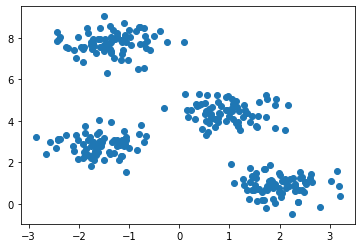

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);


In [6]:
from sklearn.cluster import KMeans

#Initialize the model by telling KMeans() the number of k.
#Feed the data to the model.
#Call predict() and use the data to get the clustering result.

#KMeans() use a extra parameter called random_state

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

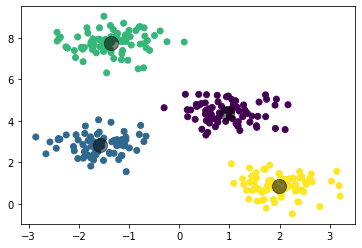

In [8]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') 
centers = kmeans.cluster_centers_ # plotting the centers onto scatter plot

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# c is for color, s is for dot size, and alpha is for transparency

#Silhoutte Coefficient and Silhoutte Plot

# using this when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model.

#The Silhouette Coefficient: mean intra-cluster distance (a),
#mean of the sample to the nearest-cluster distance (b) for all samples. 
(b−a)/max(a,b) 

#Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
#This process produces a score between 1 and -1 
#1 is highly dense clusters and -1 is completely incorrect clustering.

In [10]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

In [16]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

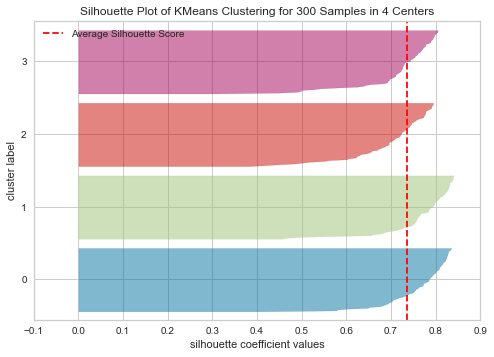

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
visualizer.fit(twoDData) 
visualizer.show()
##These two needs to be run at the same time, or you won't have the labels in x,y axies.

#quick method silhouette_visualizer

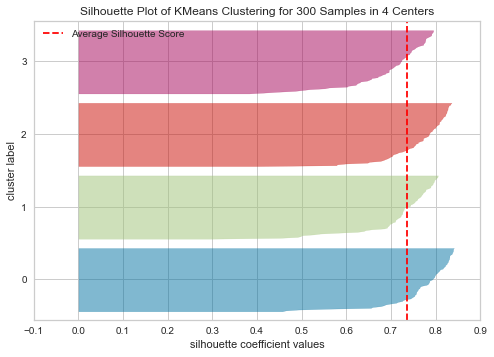

/Users/jasondeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', model=None)

In [18]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

#exmpale 
#Clustering with k-Means: Self-Reported Motivation
#check patterns in motivation over time,sort people into clusters based on those patterns.

In [19]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [21]:
motivationNA = motivation.dropna() #drop the Nan 
motivationClean = motivationNA.drop(['id'], axis = 1) #drop the id that the information do not need 
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


#try two-cluster model and check out the silhouette plot as well as the coefficient.

In [23]:
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

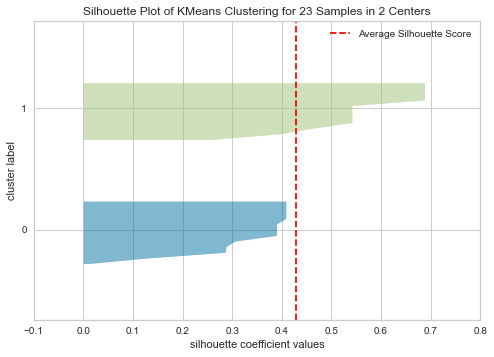

Silhouetter Score: 0.4278253443934091


In [24]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

#The score is 0.43 and the silhouette plot is not too bad. 
#Cluster 0 has a lot more similarities, Cluster 1 is more heterogeneous. 
#So we may want to increase the cluster number.

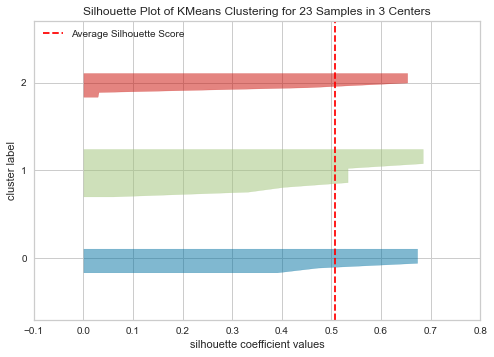

Silhouetter Score: 0.5078715772811808


In [29]:
# Try 3 clusters

motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

#all three clusters all have similar intra-cluster similarity (i.e., flat head).

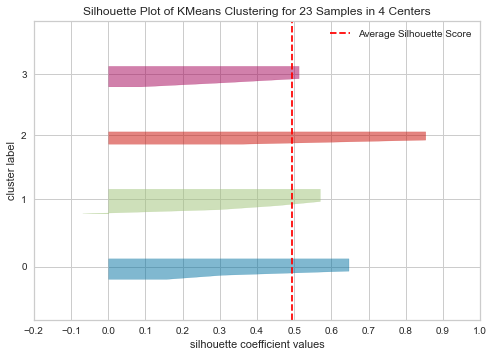

Silhouetter Score: 0.4939757511461826


In [28]:
# Try 4 clusters

motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

#4cluster is nbot too much different from 3 cluster, so 3 cluster is good 

#create a new dataframe to contain the clustering result. 
#motivationClean will be changed as motivation3cluster changes.

In [31]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,0
2,1,2.0,1,2.0,2.0,2
6,2,2.0,2,2.0,2.0,0
9,2,2.0,2,2.0,2.0,0
11,2,1.0,2,1.0,2.0,2
13,2,3.0,2,3.0,1.0,0
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,2
18,1,1.0,1,1.0,1.0,2
